#### a) Types of Encoding
#### b) Outliers
#### c) Imbalance Dataset
#### d) Transformation of Features
#### e) Feature Selection Techniques

# A)Types of Encoding

## 1) Nominal Encoding (like gender,states)
- One Hot Encoding
- One Hot Encoding with many categorical (like pincode)
- Mean Encoding (like pincode) (pincodes are replaces by its mean value)

## 2) Ordinal Encoding (vary about the rank) (like rating)
- Label Encoding (rating , education)
- Target guided Ordinal Encoding (Label are given on the bases of mean. Highest the mean, highest the label)
    - Ordering the labels according to the target
    - Replace the labels by the joint probability
    
## 3)Another Encoding i.e Count Encoding: Replace the categories with there count
- It is used when are are lots of categories of a variable
- It does not create new feature.
- Disadvantage: If same labels has same count then Replaced by same count and we will loose some valuable information    

In [1]:
import pandas as pd
import numpy as np

In [2]:
#https://www.kaggle.com/c/titanic-dataset
dataset_path='titanic-dataset/titanic_train.csv'
df=pd.read_csv(dataset_path)
df2=df.copy()
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


## 1.1 One Hot Encoding
Delete any col because col1 can be describe by col2

In [3]:
df['sex'].head()

0    female
1      male
2    female
3    female
4      male
Name: sex, dtype: object

In [4]:
pd.get_dummies(df['sex']).head()

,female,male
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


## 1.2 :  One Hot Encoding with many categorical (like pincode)
- Suppose there are more than 50 categorias of a variable then we can't apply direct One Hot Encoding 
- Find most top k categories repeating most frequent
- Then take that k categorias and create k new cols

In [5]:
print(df['cabin'].unique().shape)
df['cabin'].unique()

(136,)


array([nan, 'C82', 'D15', 'C50', 'E33', 'B57 B59 B63 B66', 'E34', 'C83',
       'C125', 'B82 B84', 'B96 B98', 'B51 B53 B55', 'C132', 'C31', 'C68',
       'B94', 'F E46', 'C126', 'D34', 'B28', 'C65', 'B52 B54 B56', 'D17',
       'C86', 'C7', 'E25', 'E17', 'D56', 'A9', 'B26', 'C91', 'B5', 'D',
       'A23', 'C22 C26', 'C124', 'E63', 'B35', 'B18', 'C6', 'B49', 'B19',
       'G6', 'D35', 'C23 C25 C27', 'C62 C64', 'B73', 'E12', 'B41', 'A20',
       'B69', 'C78', 'A14', 'D26', 'C51', 'B79', 'E52', 'C49', 'C104',
       'B61', 'D43', 'D48', 'C123', 'A7', 'D47', 'D49', 'B80', 'A29',
       'F38', 'B58 B60', 'A34', 'D33', 'D20', 'F G63', 'T', 'A6',
       'C55 C57', 'B38', 'E49', 'F4', 'E121', 'C85', 'C87', 'B86', 'B102',
       'C111', 'D22', 'B22', 'B77', 'B50', 'B30', 'E36', 'F33', 'E60',
       'B39', 'C118', 'D21', 'F2', 'E39 E41', 'E101', 'A32', 'D38',
       'C101', 'C54', 'C106', 'C32', 'D36', 'E50', 'D40', 'C30', 'C52',
       'C130', 'C80', 'F G73', 'E10', 'B10', 'B24', 'C2', 'D28', '

In [6]:
df['cabin'].value_counts().sort_values(ascending=False).head(20).index

Index(['C22 C26', 'B57 B59 B63 B66', 'G6', 'D', 'B96 B98', 'A34', 'C101',
       'F33', 'C23 C25 C27', 'C78', 'E44', 'B51 B53 B55', 'C6', 'C32', 'D21',
       'B69', 'C83', 'E34', 'C86', 'D36'],
      dtype='object')

In [7]:
top10=[x for x in df['cabin'].value_counts().sort_values(ascending=False).head(20).index]
print(top10)

['C22 C26', 'B57 B59 B63 B66', 'G6', 'D', 'B96 B98', 'A34', 'C101', 'F33', 'C23 C25 C27', 'C78', 'E44', 'B51 B53 B55', 'C6', 'C32', 'D21', 'B69', 'C83', 'E34', 'C86', 'D36']


In [8]:
for label in top10:
    df[label]=np.where(df['cabin']==label,1,0)

In [9]:
df[top10].head()

,C22 C26,B57 B59 B63 B66,G6,D,B96 B98,A34,C101,F33,C23 C25 C27,C78,E44,B51 B53 B55,C6,C32,D21,B69,C83,E34,C86,D36
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Now drop cabin column

## 1.3) Mean Encoding 

In [10]:
df=df2[['cabin','survived']].copy()
df.dropna(inplace=True)

In [11]:
df.head()

,cabin,survived
10,C82,0
11,D15,1
12,C50,1
18,E33,1
37,B57 B59 B63 B66,1


In [12]:
df['cabin'].value_counts()/len(df['cabin'])

C22 C26            0.020942
B96 B98            0.020942
G6                 0.020942
B57 B59 B63 B66    0.020942
D                  0.020942
                     ...   
B86                0.005236
C39                0.005236
C87                0.005236
E31                0.005236
B10                0.005236
Name: cabin, Length: 135, dtype: float64

In [13]:
temp=df['cabin'].value_counts()/len(df['cabin'])
mean_nominal_encode=temp.to_dict()

from collections import Counter
Counter(mean_nominal_encode).most_common(5)

[('C22 C26', 0.020942408376963352),
 ('B96 B98', 0.020942408376963352),
 ('G6', 0.020942408376963352),
 ('B57 B59 B63 B66', 0.020942408376963352),
 ('D', 0.020942408376963352)]

In [14]:
df['cabin']

10                 C82
11                 D15
12                 C50
18                 E33
37     B57 B59 B63 B66
            ...       
839                E31
841                C78
844                C93
845                C39
846                B37
Name: cabin, Length: 191, dtype: object

In [15]:
df['mean_nominal_encode']=df['cabin'].map(mean_nominal_encode)
df[['cabin','mean_nominal_encode']].tail(10)

,cabin,mean_nominal_encode
830,D20,0.010471
832,D26,0.010471
834,C46,0.005236
837,C54,0.010471
838,D,0.020942
839,E31,0.005236
841,C78,0.015707
844,C93,0.005236
845,C39,0.005236
846,B37,0.005236


## 2.1)Label Encoding

In [16]:
dict={'Degree':['be','phd','bsc']}
df=pd.DataFrame(data=dict)
df

,Degree
0,be
1,phd
2,bsc


In [17]:
mapping={'phd':2,'bsc':1,'be':0}
df['Degree']=df['Degree'].map(mapping)
df

,Degree
0,0
1,2
2,1


## 2.2)Target guided Ordinal Encoding

In [18]:
df=df2[['cabin','survived']].copy()
df.dropna(inplace=True)

In [19]:
df[['cabin','survived']].head()

,cabin,survived
10,C82,0
11,D15,1
12,C50,1
18,E33,1
37,B57 B59 B63 B66,1


In [20]:
df.groupby(['cabin'])['survived'].mean()

cabin
A14    0.0
A20    1.0
A23    1.0
A24    0.0
A29    0.0
      ... 
F33    1.0
F38    0.0
F4     1.0
G6     0.5
T      0.0
Name: survived, Length: 135, dtype: float64

In [21]:
mean_ordinal=df.groupby(['cabin'])['survived'].mean().to_dict()
Counter(mean_ordinal).most_common(10)

[('A20', 1.0),
 ('A23', 1.0),
 ('A34', 1.0),
 ('A6', 1.0),
 ('A9', 1.0),
 ('B101', 1.0),
 ('B18', 1.0),
 ('B20', 1.0),
 ('B26', 1.0),
 ('B28', 1.0)]

In [22]:
df['mean_nominal_encode']=df['cabin'].map(mean_ordinal)
df[['cabin','mean_nominal_encode']].tail(10)

,cabin,mean_nominal_encode
830,D20,1.0
832,D26,0.0
834,C46,1.0
837,C54,1.0
838,D,0.5
839,E31,0.0
841,C78,1.0
844,C93,1.0
845,C39,0.0
846,B37,0.0


# 3)Count Encoding: Replace the categories with there count
- It is used when are are lots of categories of a variable
- It does not create new feature.
- Disadvantage: If same labels has same count then Replaced by same count and we will loose some valuable information

In [23]:
df=df2[['cabin','survived']].copy()
df.dropna(inplace=True)
df.head()

,cabin,survived
10,C82,0
11,D15,1
12,C50,1
18,E33,1
37,B57 B59 B63 B66,1


In [24]:
df['cabin'].value_counts().to_dict()

{'C22 C26': 4,
 'B96 B98': 4,
 'G6': 4,
 'B57 B59 B63 B66': 4,
 'D': 4,
 'A34': 3,
 'C23 C25 C27': 3,
 'F33': 3,
 'C101': 3,
 'C78': 3,
 'C54': 2,
 'F G73': 2,
 'B18': 2,
 'B35': 2,
 'C55 C57': 2,
 'C62 C64': 2,
 'C31': 2,
 'C7': 2,
 'C65': 2,
 'F2': 2,
 'D20': 2,
 'D26': 2,
 'D15': 2,
 'C124': 2,
 'C80': 2,
 'B51 B53 B55': 2,
 'D36': 2,
 'C6': 2,
 'D21': 2,
 'B69': 2,
 'E33': 2,
 'C83': 2,
 'E44': 2,
 'E34': 2,
 'D17': 2,
 'C32': 2,
 'E101': 2,
 'B22': 2,
 'B49': 2,
 'C86': 2,
 'E121': 2,
 'F G63': 1,
 'B80': 1,
 'A14': 1,
 'D22': 1,
 'A7': 1,
 'E24': 1,
 'B5': 1,
 'B61': 1,
 'F E46': 1,
 'E50': 1,
 'A6': 1,
 'B28': 1,
 'E8': 1,
 'D11': 1,
 'B37': 1,
 'C93': 1,
 'B94': 1,
 'D33': 1,
 'D37': 1,
 'B52 B54 B56': 1,
 'E39 E41': 1,
 'B41': 1,
 'C104': 1,
 'C97': 1,
 'B19': 1,
 'C125': 1,
 'B77': 1,
 'E25': 1,
 'A23': 1,
 'D56': 1,
 'E63': 1,
 'F E57': 1,
 'C123': 1,
 'B39': 1,
 'C106': 1,
 'B24': 1,
 'D30': 1,
 'C52': 1,
 'C82': 1,
 'E36': 1,
 'C111': 1,
 'D48': 1,
 'A20': 1,
 'B101': 1,
 

In [25]:
df['cabin_count']=df['cabin'].map(df['cabin'].value_counts().to_dict())
df[['cabin','cabin_count']]

,cabin,cabin_count
10,C82,1
11,D15,2
12,C50,1
18,E33,2
37,B57 B59 B63 B66,4
...,...,...
839,E31,1
841,C78,3
844,C93,1
845,C39,1


# B)Outliers
https://github.com/krishnaik06/Feature-Engineering-Live-sessions/blob/master/Outliers.ipynb

## Which Machine LEarning Models Are Sensitive To Outliers?
1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM-------- Not Sensitive To Outliers
3. Linear Regression---------- Sensitive To Outliers
4. Logistic Regression------- Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive
6. Ensemble(RF,XGboost,GB)------- Not Sensitive
7. KNN--------------------------- Not Sensitive
8. Kmeans------------------------ Sensitive
9. Hierarichal------------------- Sensitive
10. PCA-------------------------- Sensitive
11. Neural Networks-------------- Sensitive

## 1. If The Data Is Normally Distributed We use this:
    uppper_boundary=df['Age'].mean() + 3* df['Age'].std() 
    lower_boundary=df['Age'].mean() - 3* df['Age'].std() 

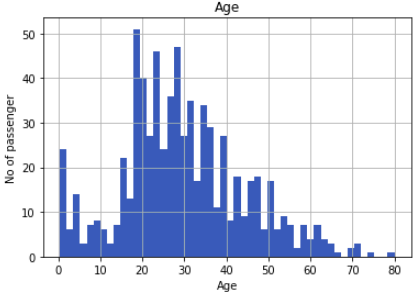

## 2. If Features Are Skewed We Use the below Technique:
    IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25) 
    lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5) 
    upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
    

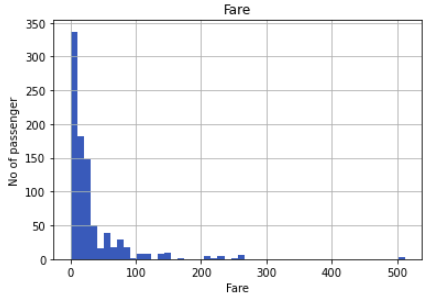

# C)Handling Imbalanced Dataset

https://github.com/krishnaik06/Handle-Imbalanced-Dataset

1) Increase class weight

2) Under Sampling - reduce the points of the max labels 

3) Over Sampling

4) SMOTETomek: Combine over- and under-sampling using SMOTE and Tomek links.

5) Ensemble Techniques

# D) Transformation of Features

https://github.com/krishnaik06/Feature-Engineering-Live-sessions/blob/master/Feature%20Engineering-%20Normalization%20And%20Standardization-%20Day%205.ipynb

## Why Feature Scaling 
- Scaling down the feature it easy to run and calculations become easy
- All tree based models does not require scaling let it be regression pr classification problem

## Types Of Transformation
1. Normalization And Standardization
2. Scaling to Minimum And Maximum values
3. Scaling To Median And Quantiles
4. Guassian Transformation Logarithmic Transformation Reciprocal Trnasformation Square Root Transformation
5. Exponential Trnasformation Box Cox Transformation

## 1)Standardization:
We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero. z=(x-x_mean)/std

## 2)Normalization:
Min Max Scaling scales the values between 0 to 1. X_scaled = (X - X.min / (X.max - X.min)

## 3)Guassian Transformation
Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance

- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation

# E)Feature Selection Techniques
https://github.com/krishnaik06/Feature-Engineering-Live-sessions/blob/master/Feature%20Selection-Day%207.ipynb

1) Univariate Selection: \
Univariate feature selection works by selecting the best features based on univariate statistical tests. We compare each feature to the target variable, to see whether there is any statistically significant relationship between them.

2) Feature Importance \
This technique gives you a score for each feature of your data,the higher the score more relevant it is.

3) Correlation

4) Information Gain
